<br>
Import the required libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

<br>
Loading the data,
Visualising it, using a pairplot. <br>
Selecting all features except "class" as X, selecting "class" as y, and splitting into train and test with test_size=0.2, or 20%, and using random_state=YOUR_ID <br>
[1 marks]
<br>

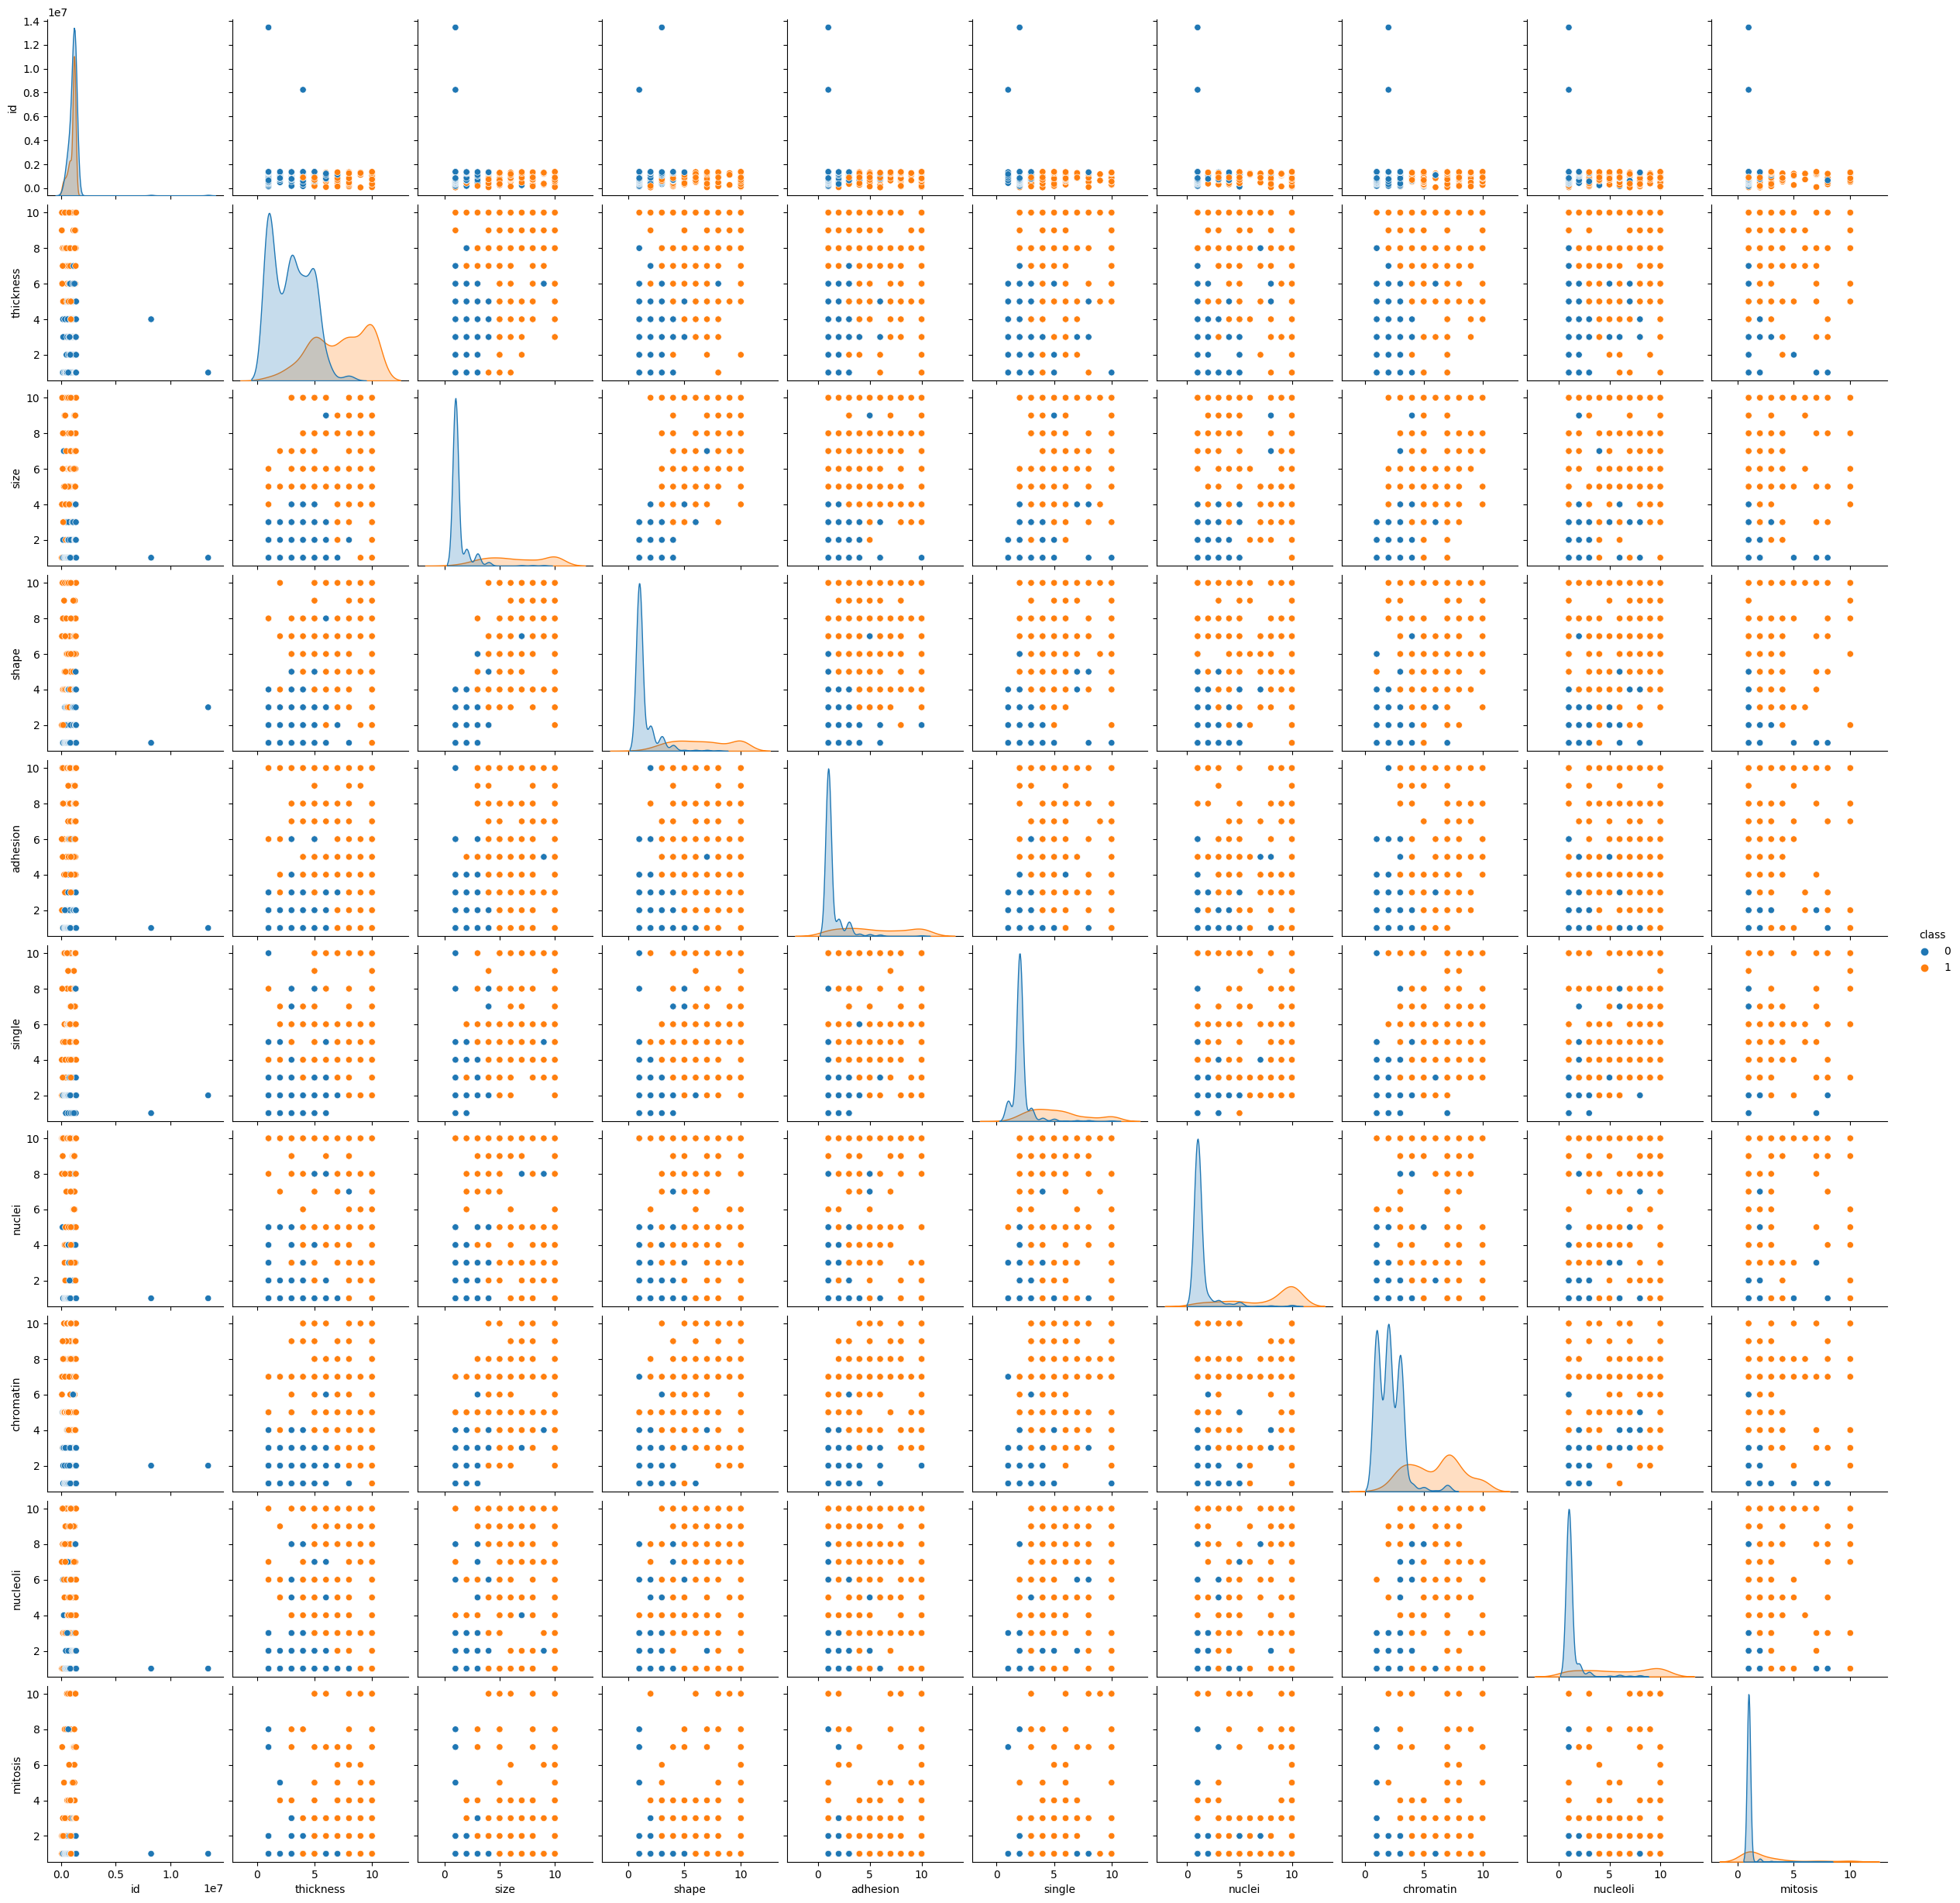

In [ ]:
# Load the data set from the provided URL.
url = "https://raw.githubusercontent.com/bpfa/data_for_compx310_2023/main/wisconsin_breast_cancer.csv"
df = pd.read_csv(url)

# Drop missing values
df = df.dropna()

# Visualize the data using a pairplot
sns.pairplot(df, hue='class')
plt.show()

# Select all features except "class" as X
X = df.drop('class', axis=1)

# Drop the ID column
X = X.iloc[:, 1:-1]

# select "class" as y
Y = df['class']

# split into train and test with test_size=0.2, or 20%, and using random_state=YOUR_ID
testSize = 0.2
MY_ID = 1481257
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = testSize, random_state = MY_ID)



Train an kNN classifier on the train set
and use it to predict for the test set. <br>
Generate a confusion_matrix and a classification_report,
and print both.<br>
[1 mark]
<br>

In [ ]:
# Train an kNN classifier on the train set
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

# Use this classifier to predict for the test set
Y_pred = knn.predict(X_test)

# Generate the confusion matrix and the classification report
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# print both the matrix and the report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Confusion Matrix:
[[86  3]
 [ 0 48]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        89
           1       0.94      1.00      0.97        48

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



<br><br><br><br>
Train a kNN classifier for different numbers of neighbours (from k = 1 to k = 100), and record the respective prediction accuracies for the test set.  Generate a plot for "k vs. accuracy". <br>
[1 mark]
<br>

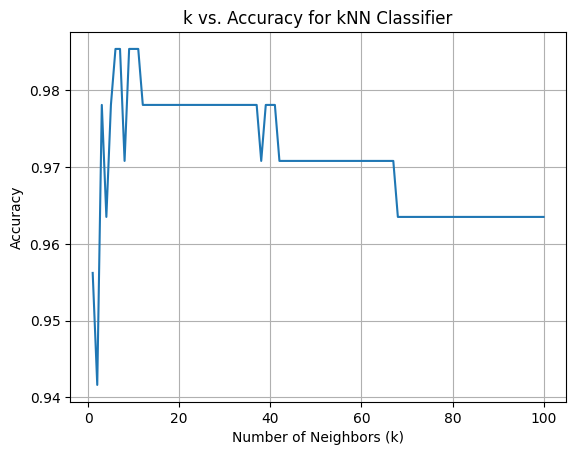

In [ ]:
# prepare to record prediction accuracies for different numbers of neighbours (from k = 1 to k = 100)
accuracies = []
k_values = range(1, 101)

# Create a loop to train the kNN classifier for different numbers
# of neighbours, and record the respective prediction accuracies for the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy = np.mean(Y_pred == Y_test)
    accuracies.append(accuracy)

# Generate a plot of "k vs. accuracy"
plt.plot(k_values, accuracies)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("k vs. Accuracy for kNN Classifier")
plt.grid(True)
plt.show()
